In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)

In [4]:
kmeans = KMeans(n_clusters=3,verbose=3,random_state=2023)
kmeans.fit(wine_std)  

Initialization complete
Iteration 0, inertia 2548.417250768871.
Iteration 1, inertia 1337.4498210139172.
Iteration 2, inertia 1288.1962895450683.
Iteration 3, inertia 1281.2533740452782.
Iteration 4, inertia 1279.9661527749454.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1940.3953124511413.
Iteration 1, inertia 1303.7498623449578.
Iteration 2, inertia 1284.846102668214.
Iteration 3, inertia 1279.0216012172793.
Iteration 4, inertia 1278.7607763668145.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3068.5722653418416.
Iteration 1, inertia 1494.3738367959832.
Iteration 2, inertia 1366.7128796343127.
Iteration 3, inertia 1306.8461878913715.
Iteration 4, inertia 1293.0989737548275.
Iteration 5, inertia 1282.9070612352145.
Iteration 6, inertia 1279.1840992051702.
Iteration 7, inertia 1277.928488844642.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2096.20465

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023, verbose=3)

In [11]:
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [5]:
df = pd.DataFrame(wine_pca,columns=['PC1','PC2'])
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.head(10)

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,2
1,2.209465,0.333393,0,2
2,2.516740,-1.031151,0,2
3,3.757066,-2.756372,0,2
4,1.008908,-0.869831,0,2
5,3.050254,-2.122401,0,2
6,2.449090,-1.174850,0,2
7,2.059437,-1.608963,0,2
8,2.510874,-0.918071,0,2
9,2.753628,-0.789438,0,2


In [6]:
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      2         59
1      0         65
       1          3
       2          3
2      1         48

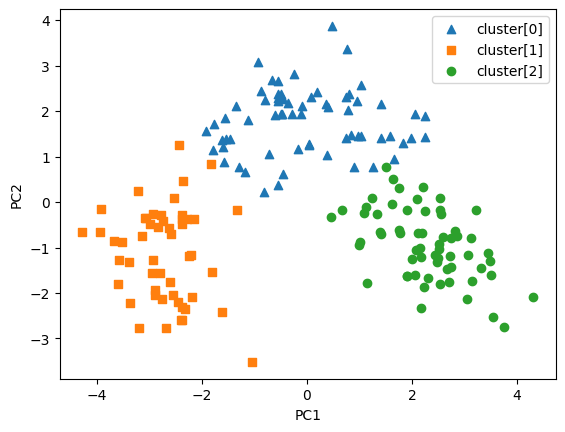

In [7]:
markers = ['^','s','o'] 
for i,marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data,y_data,marker=marker,label='cluster'+str([i]))
plt.legend()
plt.xlabel('PC1'),plt.ylabel('PC2');

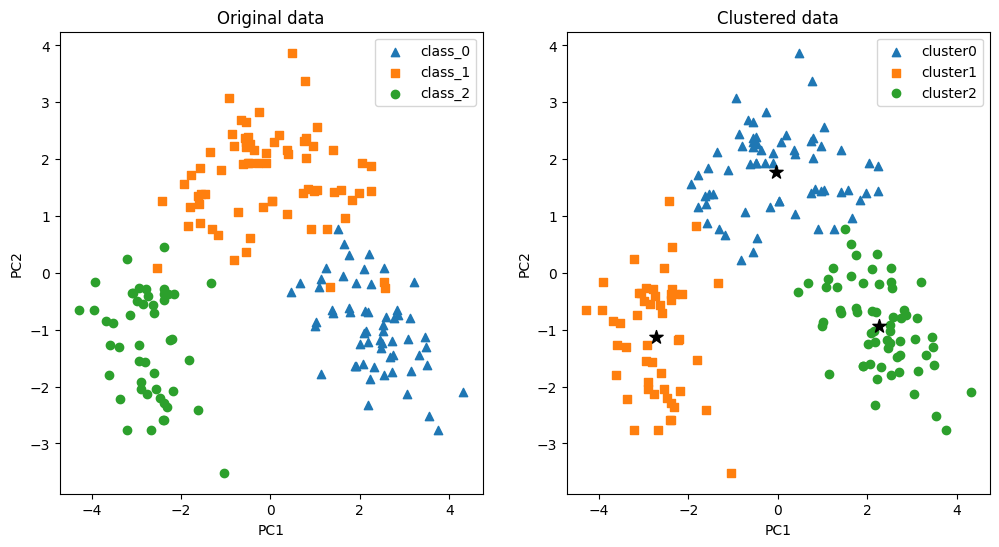

In [12]:
plt.figure(figsize=(12,6))
for k,column in enumerate(['target','cluster']):
    plt.subplot(1,2,k+1)
    for i,marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data,y_data,marker=marker,label=wine.target_names[i])
        else:
            plt.scatter(x_data,y_data,marker=marker,label='cluster'+str(i))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='black',s=100)

    
    plt.legend()
    plt.xlabel('PC1'),plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data');
    else:
        plt.title('Clustered data');